# Configurações

In [27]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from PIL import Image
import matplotlib.pyplot as plt
import folium
import random

# Importação dos dados

In [3]:
# Classe para carregar os dados
class Load():

  # Caminho dos GEOJSON para criação do mapa
  def __init__(self):
    self.files = [
        ]
  # Cria um mapa interativo com os talhões desenhados
  def downloadMap(self):
    map_south_brazil = folium.Map(location=[-25, -50], zoom_start=6)
    for f in self.files:
      data_polys = gpd.read_file(f)
      folium.GeoJson(data_polys).add_to(map_south_brazil)
    map_south_brazil.save("map_brazil.html")

  # Carrega e salva o GeoJSON, tendo como parâmetro o caminho
  def loadGeoJSON(self, path):
    data = gpd.read_file(path)
    return data

  # Plota o GEOJSON tendo que receber o dado GeoJSON de parâmetro
  def viewGeoJSON(self, data):
    data.plot()

  # Carrega uma imagem tif com o caminho especificado
  def loadImage(self, path):
    with Image.open(path) as img:
      img.load()
    return img

  # Plota a imagem tif no terminal, sendo necessário carregar a imagem no parâmetro
  def viewImage(self, image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

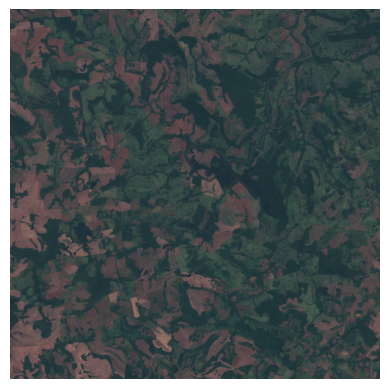

In [17]:
env = Load()

image = env.loadImage('/content/drive/MyDrive/Colab Notebooks/Módulo 10/563_2019-10-25_S2L1C_22JDT_TCI.tif')

env.viewImage(image)

# Edições mistas da imagem

Dimensões da imagem: (1200, 1200, 3)
Primeiro pixel(?): [[88 70 72]
 [89 69 72]
 [89 68 72]
 ...
 [59 70 70]
 [58 72 72]
 [61 71 70]]
Acho que é esse aqui:[88 70 72]


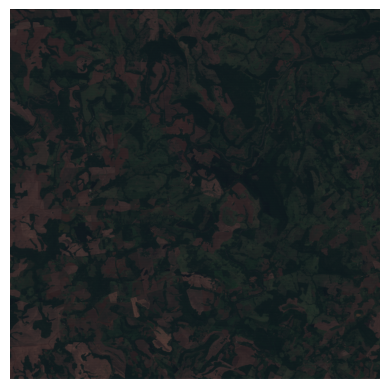

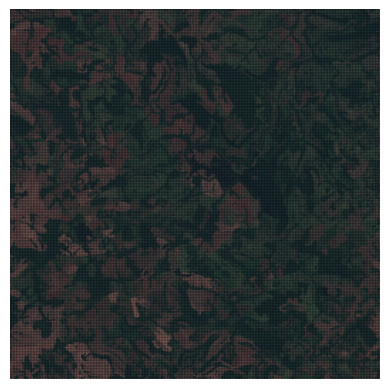

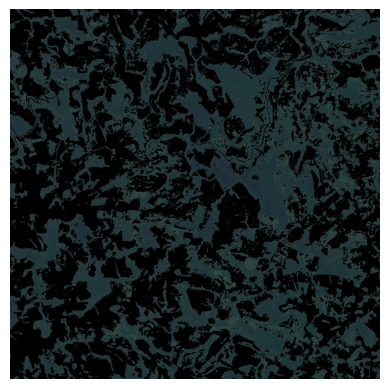

In [49]:
img = np.array(image)

print("Dimensões da imagem: " + str(img.shape))

print("Primeiro pixel(?): " + str(img[0]))

print("Acho que é esse aqui:" + str(img[0][0]))

# Isto escurece a imagem (me parece que troca alguns pixels por apenas preto)
x = 0
for i in img:
  if x % 2 == 0:
    img[x] = 0
  x += 1

env.viewImage(img)

img = np.array(image)


# Quadriculados
x = 0
y = 0
for i in img:
  for j in i:
    if x % 5 == 0 or y % 5 == 0:
      img[x][y] = [0,0,0]
    x += 1
    if x >= 1200:
      x = 0
      y += 1

env.viewImage(img)

img = np.array(image)

# Tira tudo o que é vermelho (o que na teoria significa que só sobrou a mata):

x = 0
y = 0
for i in img:
  for j in i:
    if img[x][y][0] >= 50:
      img[x][y] = [0, 0, 0]
    x += 1
    if x >= 1200:
      x = 0
      y += 1

env.viewImage(img)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
